In [71]:
# Generate a timestamped SHA-256 hashed API token for secure authentication
import base64
import hashlib
import time

# Get timestamp
timestamp = str(int(time.time()))
time_stamped_token = "6cda1a4e2fb69bb81753969e9758cf6d39041809c2e701604ee50ee8dcb7a81a" + ':' + timestamp

# Get hashed API token
hashed_token = hashlib.sha256(time_stamped_token.encode('utf-8')).hexdigest()

# Corrected authentication string formatting
authentication = "{}:{}".format("337177", hashed_token)

# Encode the authentication token in base64
api_token = base64.b64encode(authentication.encode('utf-8')).decode('ascii')

# Output the result
print(api_token)

MzM3MTc3OmNlMzBmMGNkYjA1N2VmYTJmY2E2YmRlMjRjODUzMzBjNWM5ZGM3NTljYmM5MzZiOWJkMmNkOGIyNjc4OTYwMzk=


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Symbole de l'action (ex. : Apple)
symbol = "EURUSD=X"

# Télécharger les données historiques pour 1 jour avec un intervalle de 5 minutes
stock = yf.Ticker(symbol)
df = stock.history(period="1d", interval="1m")  # Période de 1 jour, intervalle de 1 minutes

# Afficher les données
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-01-16 00:00:00+00:00,1.029866,1.029866,1.029866,1.029866,0,0.0,0.0
2025-01-16 00:01:00+00:00,1.029866,1.029866,1.029866,1.029866,0,0.0,0.0
2025-01-16 00:02:00+00:00,1.029760,1.029760,1.029760,1.029760,0,0.0,0.0
2025-01-16 00:03:00+00:00,1.029760,1.029760,1.029760,1.029760,0,0.0,0.0
2025-01-16 00:04:00+00:00,1.029760,1.029760,1.029760,1.029760,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-16 03:14:00+00:00,1.029018,1.029018,1.029018,1.029018,0,0.0,0.0
2025-01-16 03:15:00+00:00,1.028912,1.028912,1.028912,1.028912,0,0.0,0.0
2025-01-16 03:16:00+00:00,1.028912,1.028912,1.028912,1.028912,0,0.0,0.0


In [73]:
green_df = df[df.Close > df.Open].copy()
green_df["Height"] = green_df["Close"] - green_df["Open"]

red_df = df[df.Close < df.Open].copy()
red_df["Height"] = red_df["Open"] - red_df["Close"]

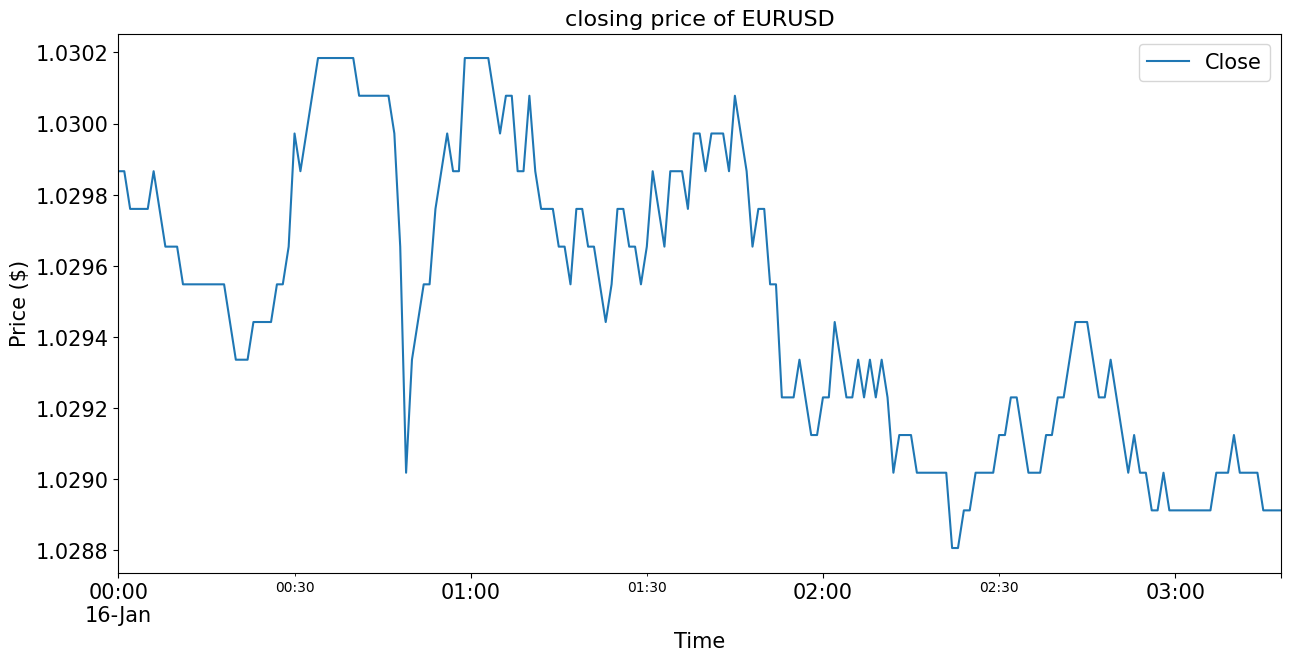

In [74]:
# Plotting the closing price
# Visualizing the closing price of EURUSD (each minute per day)

# plot the adj closing price
plt.figure(figsize=(15, 7))
df['Close'].plot()

# set labels and sizes of the title and axis
plt.title('closing price of EURUSD',
fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# show the plot
plt.show()

In [75]:
# Now we create an SMA series with a window size of three. 
# We can create the rolling window using the rolling() method for a Pandas Series, 
# followed by the mean() method to extract the average value from the window (a collection of price points).
# creates a new SMA column called SMA-3 and subsets to keep only two columns: the closing price and the SMA column.

# Creating simple moving averages

window = 3
SMA1 = "SMA-" + str(window)
df[SMA1] = df['Close'].rolling(window).mean()
colnames = ["Close", SMA1]
df2 = df[colnames]
df2.head()

,Close,SMA-3
Datetime,,
2025-01-16 00:00:00+00:00,1.029866,NaN
2025-01-16 00:01:00+00:00,1.029866,NaN
2025-01-16 00:02:00+00:00,1.029760,1.029831
2025-01-16 00:03:00+00:00,1.029760,1.029795
2025-01-16 00:04:00+00:00,1.029760,1.029760


In [76]:
# We note that the third entry of the SMA column is 1.029 

np.mean(df['Close'][:3])

1.029830773671468

In [77]:
# Note that we can configure the min_periods argument in the rolling() function to control the behavior at the initial windows with incomplete data.
# For example, by setting min_periods=1, the previous code will report the average value based on the available data in the window. 
# See the following code snippet for a comparison:

df['New_SMA'] = df['Close'].rolling(window, min_periods=1).mean()
df[colnames + ['New_SMA']].head()

,Close,SMA-3,New_SMA
Datetime,,,
2025-01-16 00:00:00+00:00,1.029866,NaN,1.029866
2025-01-16 00:01:00+00:00,1.029866,NaN,1.029866
2025-01-16 00:02:00+00:00,1.029760,1.029831,1.029831
2025-01-16 00:03:00+00:00,1.029760,1.029795,1.029795
2025-01-16 00:04:00+00:00,1.029760,1.029760,1.029760


Text(0, 0.5, 'Price')

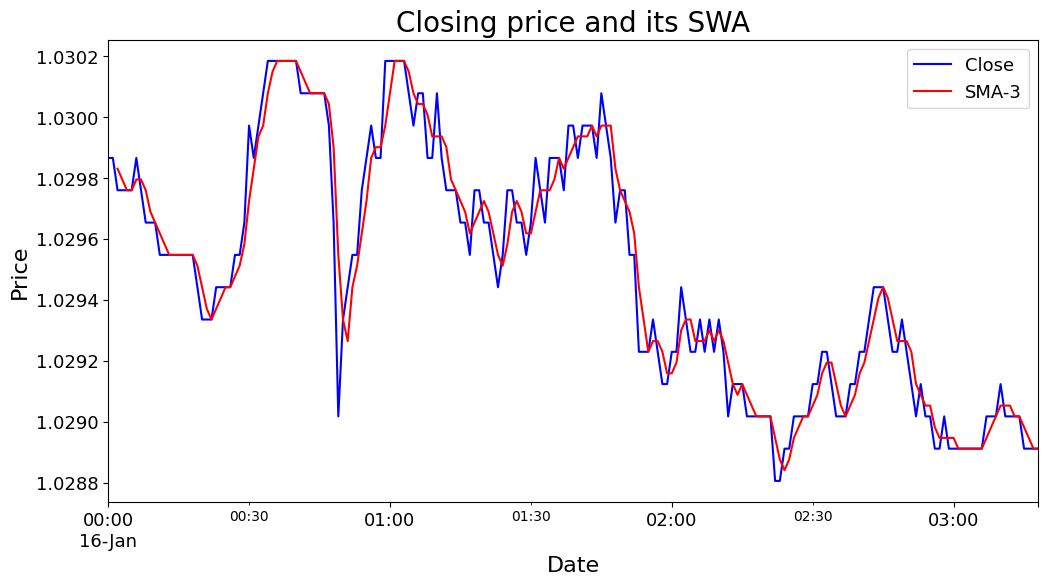

In [78]:
# Note that the only difference is in the first two entries, where we have an incomplete set of values in the rolling window.
# Next, we plot the three-period SMA alongside the original closing price series, 

# Plotting the closing price and its SMA
# Visualizing the original price and three-period SMA

# colors for the line plot
colors = ['blue', 'red']
# line plot for original price and SMA
df2.plot(color=colors, linewidth=1.5, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(labels = colnames, fontsize=13)
# title and labels
plt.title('Closing price and its SWA',
fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

# Note that the three-period SMA curve in red looks less volatile than the original price series in blue. 
# Also, the threeperiod SMA curve starts from the third entry.

In [79]:
# Now let us add another SMA with a longer period.
# we add a 20 period SMA as an additional column to df2.

# Creating 20-period SMA
window = 20
SMA2 = "SMA-"+str(window)
df2["SMA-"+SMA2] = df2['Close'].rolling(window).mean()
colnames = ["Adj Close",SMA1,SMA2]

/tmp/ipykernel_775936/4002934512.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["SMA-"+SMA2] = df2['Close'].rolling(window).mean()


Text(0, 0.5, 'Price')

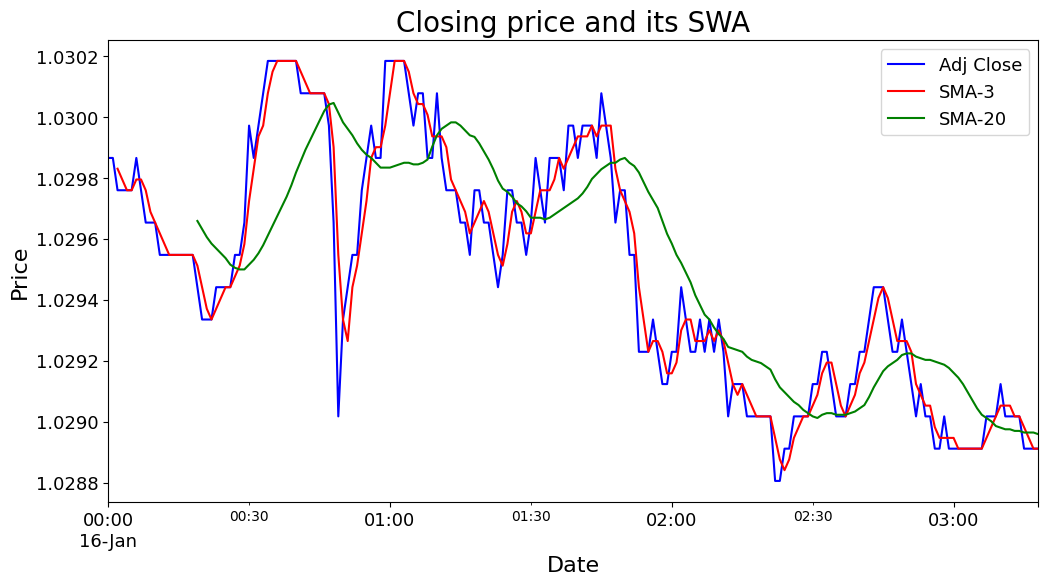

In [80]:
# Next, we overlay the 20-period SMA on the previous graph, as shown in Listing 5-12.

# Plotting the closing price and two SMAs
# Visualizing the prices together with 3-period and 20-period SMAs

# colors for the line plot
colors = ['blue', 'red', 'green']
# line plot for original price and SMA
df2.plot(color=colors, linewidth=1.5, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(labels = colnames, fontsize=13)
# title and labels
plt.title('Closing price and its SWA', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

In [81]:
# Delving into Exponential Moving Averages

In [82]:
# The exponential moving average (EMA), also known as an exponentially weighted moving average (EWMA), 
# is another type of moving average that places a higher weight and significance on the most recent data points. 
# This is a key difference compared to the simple moving average, which gives equal weight to all data points within the period.
# The exponential moving average (EMA) is a widely used method to reduce the noise in the data and identify long-term trends. 
# Each EMA entry is a weighted combination of historical prices and the current price. 
# The weight of each price point decreases progressively over time, giving greater weight to recent data points.

In [83]:
# α is the smoothing factor which ranges between zero and one. 
# The smoothing factor α determines the weight given to the most recent price relative to the existing EMA. 
# A higher α emphasizes recent prices more strongly.

In [84]:
# As for the first EWMA value at time t = 0, a default choice is to set EWMA0 = S0 Therefore, EMA assumes that recent data is more relevant than old data. Such an
# Such an assumption has its merit since EMA can react faster to changes and is thus more sensitive to recent movements as compared to the simple moving average.
# This also means there is no window size to be specified by the function since all historical data points are in use.

In [85]:
# It’s important to note that while EMA provides more accurate and timely signals than SMA, 
# it might also produce more false signals as it’s more responsive to shortterm price fluctuations.

In [86]:
# The EMA can be calculated by calling the ewm() method from a Pandas Series object, followed by extracting the average value via mean(). 
# We can set the alpha argument in ewm() to directly control the importance of the current observation compared with historical ones. 
# See Listing 5-13 for an illustration, where we set α = 0.1 to give more weightage to historical prices.

In [87]:
# Creating EMA series

alpha = 0.1
df2['EWM_' + str(alpha)] = df2['Close'].ewm(alpha=alpha, adjust=False).mean()
df2.head()

# We observe that there is no missing value in the EMA series. 
# Indeed, the first entry will simply be the original price itself due to the design of the EMA weighting scheme.

/tmp/ipykernel_775936/1098862858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EWM_' + str(alpha)] = df2['Close'].ewm(alpha=alpha, adjust=False).mean()


,Close,SMA-3,SMA-SMA-20,EWM_0.1
Datetime,,,,
2025-01-16 00:00:00+00:00,1.029866,NaN,NaN,1.029866
2025-01-16 00:01:00+00:00,1.029866,NaN,NaN,1.029866
2025-01-16 00:02:00+00:00,1.029760,1.029831,NaN,1.029856
2025-01-16 00:03:00+00:00,1.029760,1.029795,NaN,1.029846
2025-01-16 00:04:00+00:00,1.029760,1.029760,NaN,1.029837


In [88]:
# Let us continue to create another EMA series with α = 0.5. In other words, we assign an equal weightage to the current observation and historical ones:

alpha = 0.5
df2['EWM_' + str(alpha)]= df2['Close'].ewm(alpha=alpha, adjust=False).mean()
df2.head()

/tmp/ipykernel_775936/2092010330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EWM_' + str(alpha)]= df2['Close'].ewm(alpha=alpha, adjust=False).mean()


,Close,SMA-3,SMA-SMA-20,EWM_0.1,EWM_0.5
Datetime,,,,,
2025-01-16 00:00:00+00:00,1.029866,NaN,NaN,1.029866,1.029866
2025-01-16 00:01:00+00:00,1.029866,NaN,NaN,1.029866,1.029866
2025-01-16 00:02:00+00:00,1.029760,1.029831,NaN,1.029856,1.029813
2025-01-16 00:03:00+00:00,1.029760,1.029795,NaN,1.029846,1.029787
2025-01-16 00:04:00+00:00,1.029760,1.029760,NaN,1.029837,1.029773


Text(0, 0.5, 'Price')

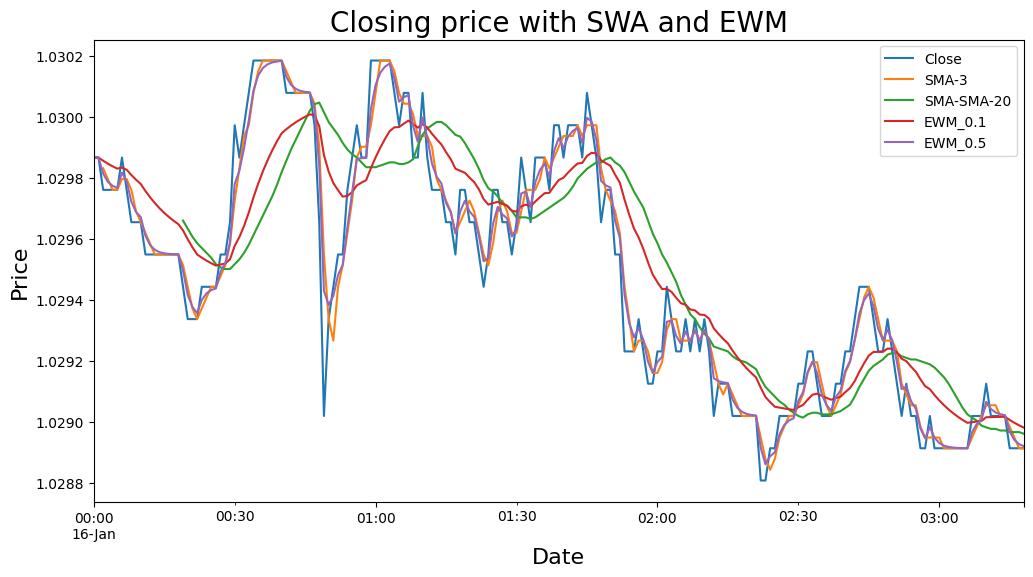

In [89]:
# Let us put all these moving averages in a single chart. 
# Here, the plot() function treats all four columns as four separate series to be plotted against the index column, 

# Plotting all moving averages together
# Visualizing the closing prices with both SMA and EMA of different configurations

df2.plot(linewidth=1.5, figsize=(12,6))
plt.title('Closing price with SWA and EWM', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)


# Running these commands generates Figure 5-13. We note that EWM_0.1 (red line) is close to SMA-20 (green line), 
# both of which give more weightage to historical observations. 
# The same is true for the other two moving averages. 
# For EMA, a small weighting factor α results in a high degree of smoothing, while a larger value leads to a quicker response to recent changes.

In [90]:
# how to use these moving averages as technical indicators to develop a trend-following strategy?

In [91]:
# Implementing the Trend-Following Strategy

In [92]:
# The trend-following strategy that relies on moving averages works like this. 
# There will be two moving averages: a short-term moving average and a long-term moving average. 
# When the short-term moving average crosses above the long-term moving average, it signals a buy action, and the trend trader enters a long position on the asset. 
# When the short-term moving average crosses below the long-term moving average, it signals a sell action, and the trend trader enters a short position on the asset.
# Thus, the strategy is based on the intersection of two moving averages: one short term (quick) and one long term (slow).

In [93]:
# Note that this framework also applies to the case when there is only one moving average series. 
# In this case, the trend trader would buy the asset when the current price is above the moving average and sell it if the current price is below the moving average.
# The key justification for such trading action is, when the price is above a moving average, an uptrend may be present, and vice versa. 
# The crossover between two lines generates the trading signal.

In [94]:
# Other momentum-related technical indicators, such as the RSI and MACD, may also be used to signal entries or exits.
# In the following section, we will implement a trend-following trading strategy using the long-term and short-term moving averages. 
# Using this strategy, we are essentially searching for the trading signal at each time point. 
# That is, we want to decide if we would buy, sell, or hold an asset at each time step. 
# The signal is generated by a crossover between two moving averages

In [95]:
# We assume no transaction cost will be incurred when performing a trading action, 
# and the market is liquid and complete (no arbitrage opportunities).
# Let us recall the main DataFrame we will work with. 
# The following command prints out the summary information using the info() function:

df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2025-01-16 00:00:00+00:00 to 2025-01-16 03:18:00+00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       199 non-null    float64
 1   SMA-3       197 non-null    float64
 2   SMA-SMA-20  180 non-null    float64
 3   EWM_0.1     199 non-null    float64
 4   EWM_0.5     199 non-null    float64
dtypes: float64(5)
memory usage: 9.3 KB


In [96]:
# Now we will use SMA-3 and SMA-20 as the respective short-term and long-term moving averages, whose crossover will generate a trading signal. 
# We leave it as an exercise to try both SMA with different window sizes and EMA with different weighting schemes.

In [97]:
# Note that we can only use the information up to yesterday to make a trading decision for tomorrow. 
# We cannot use today’s information since the closing price is not yet available in the middle of the day. 
# To enforce this requirement, we can shift the moving averages one day into the future, as shown in the following code snippet.
# Shift to the future by one day so that everyday uses the information up to


df2['SMA-3'] = df2['SMA-3'].shift(1)
df2['SMA-SMA-20'] = df2['SMA-SMA-20'].shift(1)

/tmp/ipykernel_775936/1600769539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-3'] = df2['SMA-3'].shift(1)
/tmp/ipykernel_775936/1600769539.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-SMA-20'] = df2['SMA-SMA-20'].shift(1)


In [98]:
# Now let us implement the trading rule: buy if SMA-3 > SMA-20, and sell if SMA-3 < SMA-20. 
# Such an if-else condition can be created using the np.where() function, as shown in Listing 5-15.

# Creating and identifying buy and sell signals

# identify buy signal
df2['signal'] = np.where(df2['SMA-3'] > df2['SMA-SMA-20'], 1, 0)
# identify sell signal
df2['signal'] = np.where(df2['SMA-3'] < df2['SMA-SMA-20'], -1, df2['signal'])
df2.dropna(inplace=True)

/tmp/ipykernel_775936/2741425942.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['signal'] = np.where(df2['SMA-3'] > df2['SMA-SMA-20'], 1, 0)
/tmp/ipykernel_775936/2741425942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['signal'] = np.where(df2['SMA-3'] < df2['SMA-SMA-20'], -1, df2['signal'])
/tmp/ipykernel_775936/2741425942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [99]:
# Here, a normal trading day would assume a value of either 1 or –1 in the signal column.
# When there is a missing value or other special cases, we set it to 0. 
# We also use the dropna() function to ensure that the DataFrame is of good quality by dropping rows with any NA/missing value in it. 

In [100]:
# We can check the frequency distribution of the signal column as follows:

df2['signal'].value_counts()

# The result shows that there are more declining days than inclining days, which confirms the downward trending price series shown earlier

signal
-1    99
 1    80
Name: count, dtype: int64

In [101]:
# Next, we introduce a baseline strategy called buy-and-hold, 
# Also, we will use the log return instead of the raw return to facilitate the calculations.

In [102]:
# The following code snippet calculates the instantaneous logarithmic single-period return, 
# where we first take the logarithm of the Closing prices and then call the diff() function to obtain the differences between consecutive pairs of prices:

df2['log_return_buy_n_hold'] = np.log(df2['Close']).diff()

/tmp/ipykernel_775936/3431065645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_buy_n_hold'] = np.log(df2['Close']).diff()


In [103]:
# Now comes the calculation of the single-period return for the trend-following strategy.
# Recall the signal column we created earlier. 
# This column represents whether we go long (valued 1) or short (value –1) in a position for every single period. 
# This also shows that the logarithmic return

# This creates the following four scenarios when the asset moves from St to St + 1:
# *When we long an asset and its logarithmic return is positive, the trend-following strategy reports a positive return (search the formulas)
# *When we long an asset and its logarithmic return is negative, the trend-following strategy reports a negative return
# *When we short an asset and its logarithmic return is positive, the trend-following strategy reports a negative return
# *When we short an asset and its logarithmic return is negative, the trend-following strategy reports a positive return

In [104]:
# Summarizing these four scenarios, 
# we can obtain the single-period logarithmic return for the trend-following strategy by multiplying signal with the log_return_buy_n_hold 
# (the single-period logarithmic return based on the buy-and-hold strategy), 

# Calculating the log return of the trend-following strategy

df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']

/tmp/ipykernel_775936/1777820287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']


In [105]:
# Compared with the buy-and-hold strategy, the key difference is the additional shorting actions generated by the trend-following strategy. 
# That is, when the stock price drops, 
# the buy-and-hold strategy will register a loss, 
# while the trend-following strategy will make a profit if the trading signal is to go short.
# Creating a good trading signal thus makes all the difference.

In [106]:
# Next, we create explicit trading actions. 
# The signal column tells us whether we should go long or short in the given asset under the trend-following strategy.
# However, this does not mean we need to make a trade at every period. 
# If the signal remains the same for two consecutive periods, we simply hold on to the position and remain seated. 
# In other words, there is no trading action for this specific trading day.
# This applies in the case of two consecutive 1s or –1s in the signal column.
# On the other hand, we will make an action when there is a sign switch in the trading signal, changing from 1 to –1 or from –1 to 1. 
# The former means changing from longing a unit of stock to shorting it, while the latter means the reverse.

In [107]:
# To create the trading actions, we can use the diff() method again on the signal column, as shown in the following:

df2['action'] = df2.signal.diff()

/tmp/ipykernel_775936/2192161049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['action'] = df2.signal.diff()


In [108]:
# We can produce a frequency count of different trading actions using the value_counts() function:

df2['action'].value_counts()

action
 0.0    162
 2.0      8
-2.0      8
Name: count, dtype: int64

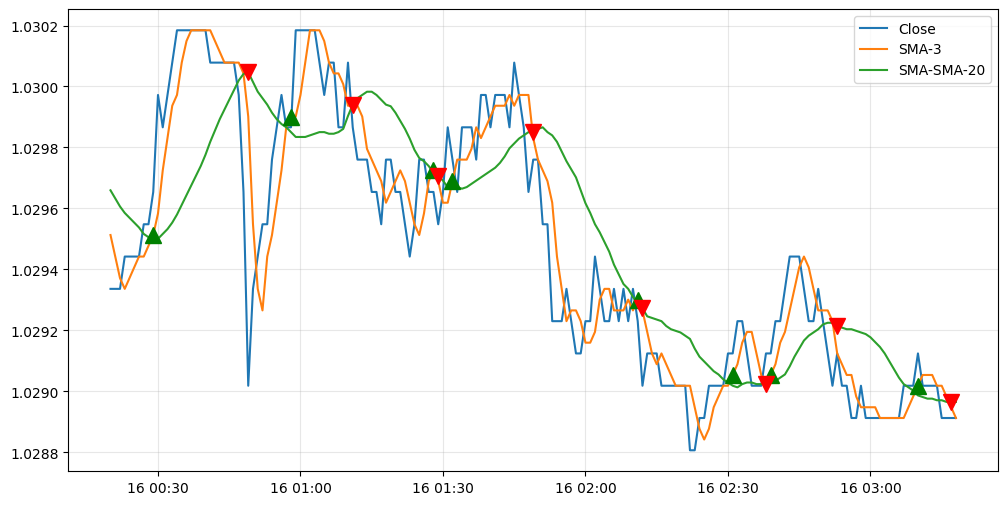

In [109]:
# We can visualize these trading actions as triangles on the graph with stock prices and SMAs. 
# We indicate a buy action via the green triangle facing upward when the short-term SMA crosses above the long-term SMA. 
# On the other hand, we use a red triangle facing downward to indicate a sell action when the shortterm SMA crosses below the long-term SMA.

# Visualizing trading actions
# Visualizing the trading actions, including going from short to long (green triangles) and long to short (red triangles)

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df2['Close'], label = 'Close')
plt.plot(df2['SMA-3'], label = 'SMA-3')
plt.plot(df2['SMA-SMA-20'], label = 'SMA-SMA-20')
plt.plot(df2.loc[df2.action == 2].index, df2['SMA-3'] [df2.action == 2], '^', color = 'g', markersize = 12)
plt.plot(df2[df2.action == -2].index, df2['SMA-SMA-20'] [df2.action == -2], 'v', color = 'r', markersize = 12)
plt.legend(loc=1);

# Again, we denote the green triangles as acting from short to long and the red triangles as moving from long to short.

In [110]:
# Let us analyze the cumulative returns of each period for both trading strategies. 
# Specifically, we would like to obtain the final percentage return,
# comparing the two trading strategies

In [111]:
# Recall that we need to multiply the 1+R return at each period to carry out the compounding process in order to obtain the terminal return (after subtracting one).
# We also know that the 1+R return is the same as the division between two consecutive prices

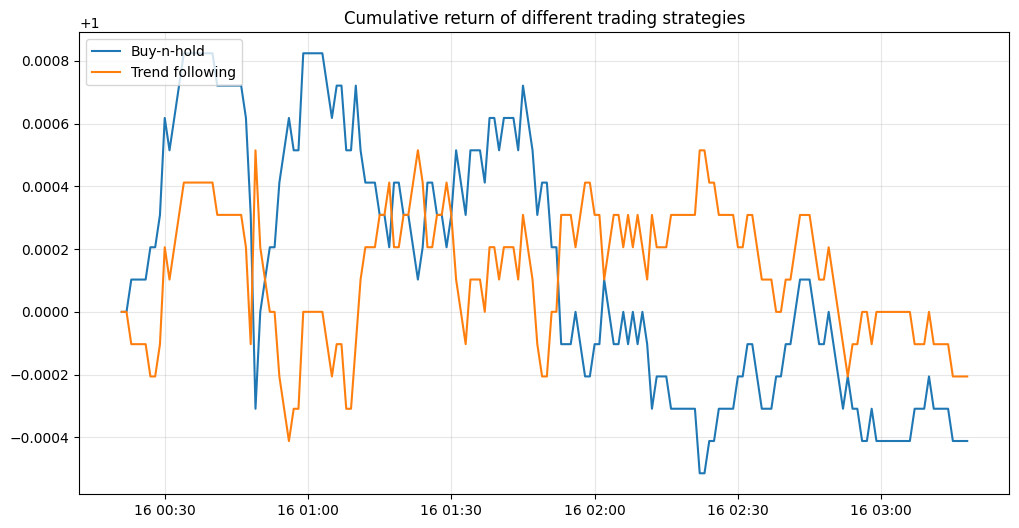

In [112]:
# calculate the terminal return, we first convert the returns from the logarithmic format to the usual percentage format using the np.exp() function, 
# then carry out the compounding by performing a cumulative product operation using the cumprod() method. 
# This is achieved, where we leave out the last step of subtracting by one and report the 1+R return

# Visualizing cumulative returns
# Comparing the cumulative return of buy-and-hold and trend-following strategies for one share of EURUSD

plt.plot(np.exp(df2['log_return_buy_n_hold']).cumprod(), label='Buy-n-hold')
plt.plot(np.exp(df2['log_return_trend_follow']).cumprod(), label='Trend following')
plt.legend(loc=2)
plt.title("Cumulative return of different trading strategies")
plt.grid(True, alpha=.3)

# which shows that the trendfollowing strategy clearly outperforms the buy-and-hold strategy. 
# However, note that this is a simplified setting that does not take into account transaction cost and other market factors. 
# More analyses and tests are needed to assess the performance of this trading strategy (also many others) in the real-world environment.

In [113]:
# Lastly, we compare the terminal returns of both strategies

In [114]:
# terminal return of buy-n-hold

np.exp(df2['log_return_buy_n_hold']).cumprod()[-1] - 1

/tmp/ipykernel_775936/2103274146.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(df2['log_return_buy_n_hold']).cumprod()[-1] - 1


-0.0004115952186884986

In [115]:
# terminal return of trend following

np.exp(df2['log_return_trend_follow']).cumprod()[-1] - 1

/tmp/ipykernel_775936/4137308244.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(df2['log_return_trend_follow']).cumprod()[-1] - 1


-0.00020590451978175217

In [116]:
# It turns out that sticking to the buy-and-hold strategy would lose by -2.3314683517128287e-15, 
# while using the trend-following strategy generates a terminal lose of 0.00020577539507282694.

In [117]:
# we covered the basics of the popular trend-following strategy and its implementation in Python. 
# We started with an exercise on working with log returns and then transitioned to different moving averages as commonly used technical indicators,
#including simple moving averages and exponential moving averages.
# Lastly, we discussed how to generate trading signals and calculate the performance metrics using this strategy, 
# which will serve as a good baseline strategy as we delve into other candidates later on.

In [118]:
returns = df.Close.pct_change()
returns

Datetime
2025-01-16 00:00:00+00:00         NaN
2025-01-16 00:01:00+00:00    0.000000
2025-01-16 00:02:00+00:00   -0.000103
2025-01-16 00:03:00+00:00    0.000000
2025-01-16 00:04:00+00:00    0.000000
                               ...   
2025-01-16 03:14:00+00:00    0.000000
2025-01-16 03:15:00+00:00   -0.000103
2025-01-16 03:16:00+00:00    0.000000
2025-01-16 03:17:00+00:00    0.000000
2025-01-16 03:18:00+00:00    0.000000
Name: Close, Length: 199, dtype: float64

In [119]:
terminal_return = df.Close.iloc[-1] / df.Close.iloc[0] - 1
terminal_return

-0.0009260177774578215

In [120]:
# We can also calculate the same value by compounding the (1+R) returns based on the .cumprod() function, 

# cumulative returns
# Calculating the same cumulative terminal return by compounding 1+R formatted returns

cum_returns = (1+returns).cumprod() - 1
cum_returns

Datetime
2025-01-16 00:00:00+00:00         NaN
2025-01-16 00:01:00+00:00    0.000000
2025-01-16 00:02:00+00:00   -0.000103
2025-01-16 00:03:00+00:00   -0.000103
2025-01-16 00:04:00+00:00   -0.000103
                               ...   
2025-01-16 03:14:00+00:00   -0.000823
2025-01-16 03:15:00+00:00   -0.000926
2025-01-16 03:16:00+00:00   -0.000926
2025-01-16 03:17:00+00:00   -0.000926
2025-01-16 03:18:00+00:00   -0.000926
Name: Close, Length: 199, dtype: float64

In [121]:
# The equality operator on both terminal returns evaluates to True or False:

# check equality on terminal return
cum_returns.values[-1] == terminal_return

False

In [122]:
# Now we calculate the same using log returns, starting by obtaining the singleperiod log returns 

# Calculating the log returns
# log returns (1+R format)

log_returns = np.log(1+returns)
log_returns

Datetime
2025-01-16 00:00:00+00:00         NaN
2025-01-16 00:01:00+00:00    0.000000
2025-01-16 00:02:00+00:00   -0.000103
2025-01-16 00:03:00+00:00    0.000000
2025-01-16 00:04:00+00:00    0.000000
                               ...   
2025-01-16 03:14:00+00:00    0.000000
2025-01-16 03:15:00+00:00   -0.000103
2025-01-16 03:16:00+00:00    0.000000
2025-01-16 03:17:00+00:00    0.000000
2025-01-16 03:18:00+00:00    0.000000
Name: Close, Length: 199, dtype: float64

In [123]:
# We can add all log returns from previous periods together to get the cumulative log returns, 
# convert back to the original scale via exponentiation, 
# and, lastly, offset by one to convert from 1+R to the simple return format,

# get cumulative returns using log returns
# Calculating the cumulative returns using log returns

cum_return2 = np.exp(log_returns.cumsum()) - 1
cum_return2

Datetime
2025-01-16 00:00:00+00:00         NaN
2025-01-16 00:01:00+00:00    0.000000
2025-01-16 00:02:00+00:00   -0.000103
2025-01-16 00:03:00+00:00   -0.000103
2025-01-16 00:04:00+00:00   -0.000103
                               ...   
2025-01-16 03:14:00+00:00   -0.000823
2025-01-16 03:15:00+00:00   -0.000926
2025-01-16 03:16:00+00:00   -0.000926
2025-01-16 03:17:00+00:00   -0.000926
2025-01-16 03:18:00+00:00   -0.000926
Name: Close, Length: 199, dtype: float64

In [124]:
# Again, we verify the value of the last entry and verify that it is the same as the previous terminal return:

# check equality on terminal return

cum_return2.values[-1] == terminal_return

False